<a href="https://colab.research.google.com/github/pds2021/a5-bene401/blob/assignment_5/bird_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai  # upgrade fastai on colab
from fastai.vision.all import *
from fastai.vision.widgets import *

     |████████████████████████████████| 194kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 


In [18]:
download_url("https://github.com/pds2021/a5-bene401/releases/download/v1.0/export.pkl", "bird_model.pkl")
learn_inf = load_learner("bird_model.pkl", cpu=True)

In [3]:
btn_upload = widgets.FileUpload()
btn_upload


FileUpload(value={}, description='Upload')

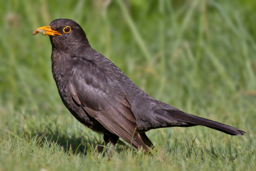

In [5]:
img = PILImage.create(btn_upload.data[-1])
img.to_thumb(256,256)


In [7]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(512,512))
out_pl

Output()

In [13]:
path = Path()
path

Path('.')

In [15]:
learn_inf = load_learner('export.pkl')

RuntimeError: ignored

In [8]:
learn_inf = load_learner(path/'export.pkl')

NameError: ignored

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {birds[pred]}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

NameError: ignored